In [32]:
import pandas as pd
import numpy as np

In [33]:
data = pd.read_csv("medicine.csv")

In [34]:
data.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [35]:
data.shape

(9720, 4)

In [36]:
data.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [37]:
data.dropna(inplace=True)

In [38]:
data.duplicated().sum()

0

In [39]:
data.describe()

,index
count,9720.000000
mean,4860.500000
std,2806.066642
min,1.000000
25%,2430.750000
50%,4860.500000
75%,7290.250000
max,9720.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


In [41]:
data['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [42]:
data['Description'].apply(lambda x : x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [43]:
data['Description'] = data['Description'].apply(lambda x : x.split())
data['Reason'] = data['Reason'].apply(lambda x : x.split())

In [44]:
data.tail()

,index,Drug_Name,Reason,Description
9715,9716,T Muce Ointment 5gm,[Wound],"[used, for, treating, warts]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,[Wound],"[used, to, soften, the, skin, cells]"
9717,9718,Wokadine M Onit 10gm,[Wound],"[used, for, scars]"
9718,9719,Wound Fix Solution 100ml,[Wound],"[used, for, wounds]"
9719,9720,Wounsol Ointment 15gm,[Wound],"[used, to, treat, and, remove, raised, warts, ..."


In [45]:
data['Description'] = data['Description'].apply(lambda x : [i.replace(" ", "") for i in x])

In [52]:
data['tags'] = data['Description'] + data['Reason']

In [53]:
data.head()

,index,Drug_Name,Reason,Description,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,[Acne],"[Mild, to, moderate, acne, (spots)]","[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,[Acne],"[A, RET, 0.025%, is, a, prescription, medicine...","[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,[Acne],"[treat, the, most, severe, form, of, acne, (no...","[treat, the, most, severe, form, of, acne, (no..."


In [54]:
new_data = data[['index', 'Drug_Name', 'tags']]

In [55]:
new_data.head()

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."


In [57]:
new_data['tags'] = new_data['tags'].apply(lambda x : " ".join(x))

<ipython-input-57-5155e566af92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(lambda x : " ".join(x))


In [59]:
new_data['tags'] = new_data['tags'].apply(lambda x : x.lower())

<ipython-input-59-ead4576bf31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(lambda x : x.lower())


In [60]:
new_data.head()

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


In [61]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = "english", max_features = 5000)

In [63]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [64]:
stem("You are so so beautiful")

'you are so so beauti'

In [65]:
new_data['tags'] = new_data['tags'].apply(stem)

<ipython-input-65-8014ff37bf23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(stem)


In [66]:
new_data.head()

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moder acn (spots) acn
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescript medicin that is us...
2,3,ACGEL CL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
3,4,ACGEL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
4,5,Acleen 1% Lotion 25ml,treat the most sever form of acn (nodular acne...


In [68]:
vectors = cv.fit_transform(new_data['tags']).toarray()

In [69]:
vectors.shape

(9720, 806)

In [71]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [74]:
similarity = cosine_similarity(vectors)

In [75]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

In [78]:
def recommendation(medicine):
    medicine_index = new_data[new_data['Drug_Name'] == medicine].index[0]
    distance = similarity[medicine_index]
    medicine_list = sorted(list(enumerate(distance)), reverse=True, key = lambda x : x[1])[1:6]
    for i in medicine_list:
        print(new_data.iloc[i[0]].Drug_Name)

In [80]:
recommendation("ACGEL CL NANO Gel 15gm")

ACGEL NANO Gel 15gm
Acnehit Gel 15gm
Acnelak Soap 75gm
Acnetor AD 1% Ointment 15gm
Acnetor AD Cream 15Acnetor AD Gel 15gm


In [81]:
import pickle
pickle.dump(new_data.to_dict(), open("medicine_dict.pkl", "wb"))
pickle.dump(similarity, open("similarity.pkl", "wb"))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data
data = pd.read_csv('medicine.csv')

# Drop non-informative columns if any
data = data.drop(columns=['index'])

# Encode categorical columns if necessary
encoder = LabelEncoder()
data['Drug_Name'] = encoder.fit_transform(data['Drug_Name'])
data['Description'] = encoder.fit_transform(data['Description'])

# Features and target
X = data.drop(columns=['Reason'])  # Features
y = data['Reason']

# Encode the target variable
y_encoded = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 85.60%


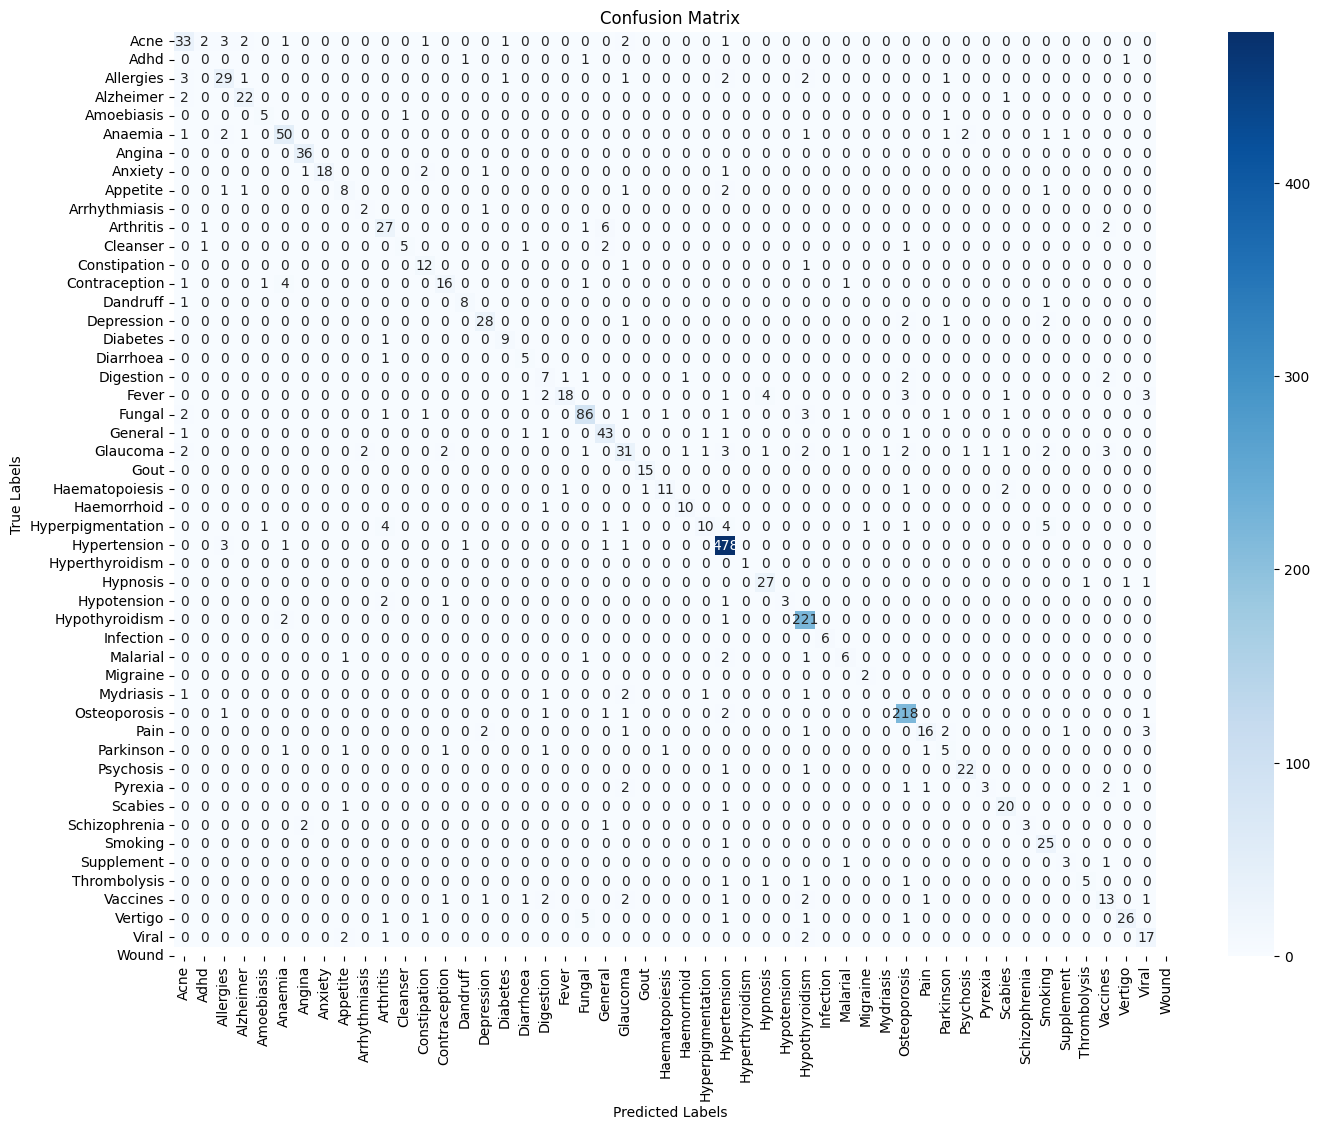

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = encoder.inverse_transform(list(set(y_encoded)))  # Decode class labels

# Plot using Seaborn heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "medicine.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
X = data.drop(['Reason', 'index'], axis=1)
y = data['Reason']

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode the target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.72%


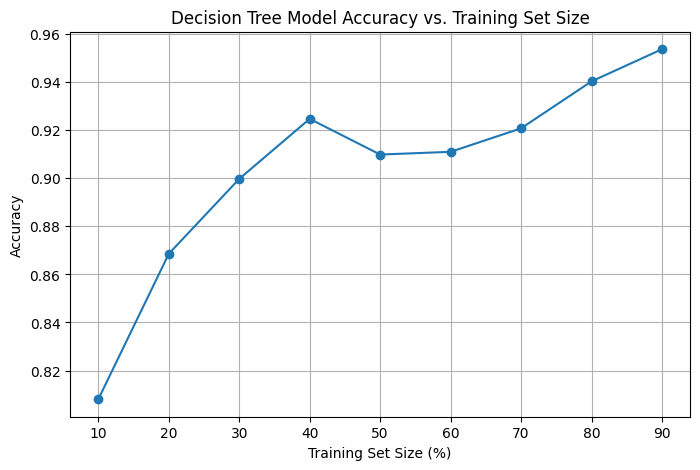

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "medicine.csv"  # Change this to the correct file path
data = pd.read_csv(file_path)

# Preprocess data
X = data.drop(['Reason', 'index'], axis=1)
y = data['Reason']

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode the target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# List of different training set sizes
train_sizes = np.linspace(0.1, 0.9, 9)  # From 10% to 90% training data
accuracies = []

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy trend
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * 100, accuracies, marker='o', linestyle='-')
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Accuracy vs. Training Set Size")
plt.grid(True)
plt.show()
